In [148]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from scipy.signal import butter, lfilter

In [149]:
def rms(y):
    return np.sqrt(np.mean([i**2 for i in y]))
def rms_over_channels(signal):
    rms_channel = []
    for i in range(len(signal)):
        rms_channel += [rms(signal[i])]
    return rms_channel

def tkeo(signal):
    tkeo_signals = []
    for i in range(1, len(signal)-1):
        tkeo_signals += [(signal[i])**2 - signal[i-1]*signal[i+1]]
    return tkeo_signals


#Band pass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

#High pass filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

#Low pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [150]:
directory = '/Users/Zoe/Desktop/flexemg_v2/dataset/'

annot = np.array(loadmat(directory + "001_5_103_2.mat")['data'])

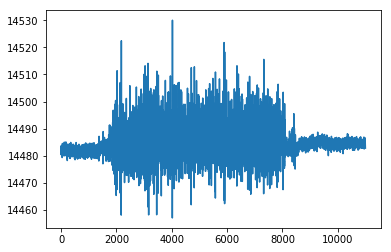

In [151]:
rms_signals = rms_over_channels(annot)

plt.plot(rms_signals)
plt.show()

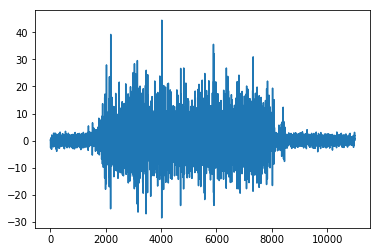

In [152]:
#high pass filter
fs = 500.0
cutoff = 2
y = butter_highpass_filter(rms_signals, cutoff, fs)

plt.plot(y)
plt.show()

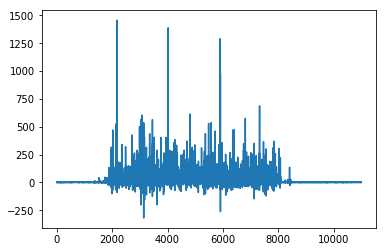

In [100]:
plt.plot(tkeo(y))
plt.show()

In [67]:
signals = []
for filename in os.listdir(directory):
    if filename[6:9] == '101':
        #print(filename)
        annots = loadmat(directory + filename)['data']
        #print((annots[:,63]))
        signals += [tkeo(butter_highpass_filter(rms_over_channels(annots), cutoff, fs))]

175


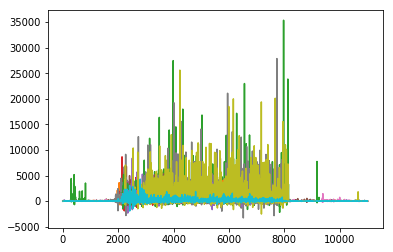

In [70]:
print(len(signals))
for i in range(30):
    plt.plot(signals[i])
#plt.axvline(x=2000)
#plt.axvline(x=6000)
plt.show()

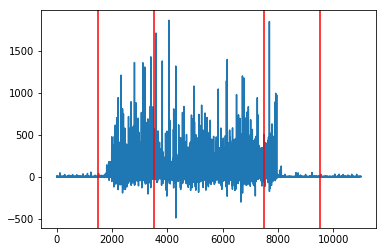

In [133]:
plt.plot(signals[0])
plt.axvline(x=1500, color='red')
plt.axvline(x=3500, color='red')
plt.axvline(x=7500, color='red')
plt.axvline(x=9500, color='red')
plt.show()

In [142]:
files = os.listdir(directory)
df = pd.DataFrame(index=files, columns=["subject_id", "gesture_id", "session_number", "trial", "effort_level", "raw_data"])

In [146]:
for filename in files:
    df["subject_id"][filename] = filename[0:3]
    df["gesture_id"][filename] = filename[6:9]
    df["session_number"][filename] = filename[4]
    df["trial"][filename] = filename[10]
    df["raw_data"][filename] = loadmat(directory + filename)['data']
 

In [147]:
print(df["subject_id"]["001_5_103_2.mat"])
df

001


,subject_id,gesture_id,session_number,trial,effort_level,raw_data
001_6_103_1.mat,001,103,6,1,NaN,"[[12175, 12058, 12804, 14195, 13169, 13011, 13..."
002_7_105_3.mat,002,105,7,3,NaN,"[[13601, 12755, 12491, 12430, 12786, 12353, 12..."
003_4_104_5.mat,003,104,4,5,NaN,"[[16195, 17551, 16715, 14058, 17784, 14686, 13..."
004_3_110_1.mat,004,110,3,1,NaN,"[[15141, 13728, 13989, 14146, 13620, 14146, 13..."
001_6_202_1.mat,001,202,6,1,NaN,"[[12831, 13225, 13443, 16297, 13637, 13592, 13..."
004_7_106_3.mat,004,106,7,3,NaN,"[[16936, 15747, 15477, 15306, 15140, 14148, 15..."
001_1_104_3.mat,001,104,1,3,NaN,"[[14029, 13855, 16174, 18014, 14711, 14219, 15..."
005_5_104_4.mat,005,104,5,4,NaN,"[[16089, 15320, 15809, 14348, 13646, 13660, 14..."
001_8_112_2.mat,001,112,8,2,NaN,"[[12799, 11539, 11784, 12328, 13834, 12299, 12..."
004_8_109_4.mat,004,109,8,4,NaN,"[[13335, 16966, 15310, 15020, 14875, 17089, 15..."
